In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [292]:
df = pd.read_excel('Spotify_data.xlsx')
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gatherings or parties","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [293]:
# New columns to be added
num_of_records = len(df)

spotify_listening_device_columns = ['smart speakers', 'voice assistants', 'computer', 'laptop', 'smartphone', 'wearable devices']

influential_mood = ['sadness', 'melancholy', 'social gatherings', 'parties', 'relaxation', 'stress relief', 'uplifting', 'motivational']

music_lis_timing = ['leisure time', 'workout session', 'study hours', 'while traveling', 'office hours', 'social gatherings ', 'night time', 'when cooking', 'random', 'before bed',]

music_exploration_method = ['playlists', 'recommendations', 'others', 'radio', 'social media', 'friends','search']

fav_pod_genre = ['comedy', 'sports', 'lifestyle', 'health', 'business', 'fitness', 'food and cooking', 'everything', 'informative', 'dance', 'technology', 'general knowledge', 'spiritual and devotional', 'finance', 'current affairs', 'murder mystery ', 'political', 'topics that interests me', 'novels', 'self help', 'educational ', 'stories']

In [294]:
def one_hot_encode_column(dataframe, original_col_name, new_col_names_prefixes, new_col_names, index):
    # Current field inside this columns
    current_value = df.loc[index, original_col_name]
    current_value = current_value.lower().strip()

    for column_name in new_col_names:
      if column_name in current_value: 
         dataframe.loc[index, f"{new_col_names_prefixes}=>{column_name}"] = 1 
      else: 
         dataframe.loc[index, f"{new_col_names_prefixes}=>{column_name}"] = 0 # nans will also be 0
    
    return dataframe

In [295]:
# Reorganize and one hot encode categorical columns and change nan to 0
for i in range(num_of_records):  
  # Change spotify_listening_device column
  df = one_hot_encode_column(dataframe=df, index=i, original_col_name='spotify_listening_device', 
                             new_col_names_prefixes="listening_device", new_col_names=spotify_listening_device_columns)

  
  # Change music_Influencial_mood column
  df = one_hot_encode_column(dataframe=df, index=i, original_col_name='music_Influencial_mood', 
                             new_col_names_prefixes="influential_mood_music", new_col_names=influential_mood)

  
  # Change music_lis_freq column
  df = one_hot_encode_column(dataframe=df, index=i, original_col_name='music_lis_frequency', 
                             new_col_names_prefixes="music_lis_timing", new_col_names=music_lis_timing)
  
  # Change music_expl_method column
  df = one_hot_encode_column(dataframe=df, index=i, original_col_name='music_expl_method', 
                             new_col_names_prefixes="music_exploration_method", new_col_names=music_exploration_method)
  
  # Change fav_pod_genre column
  record = df.loc[i, 'fav_pod_genre']
  if isinstance(record, float): 
    for column_name in fav_pod_genre:
        df.loc[i, f"fav_pod_genre=>{column_name}"] = 0
  else: 
    record = record.lower()
    for column_name in fav_pod_genre:
      if column_name in record: df.loc[i, f"fav_pod_genre=>{column_name}"] = 1 
      else: df.loc[i, f"fav_pod_genre=>{column_name}"] = 0

In [296]:
# Drop one hot encoded columns
df = df.drop(columns = ['spotify_listening_device', 'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method', 'fav_pod_genre'], axis = 1)

In [297]:
# Drop columns that still have nans. Since their nans are  almost half their number of rows
df = df.drop(columns = ['preffered_pod_duration', 'pod_host_preference', 'preffered_pod_format', 'preffered_premium_plan'], axis = 1)

In [298]:
# Prepare one hot encoded columns
age_dummies = pd.get_dummies(df['Age'], dtype=int, prefix='Age', prefix_sep='=>')
# gender_dummies = pd.get_dummies(df['Gender'], dtype=int, prefix='Gender', prefix_sep='=>')
usage_period_dummies = pd.get_dummies(df['spotify_usage_period'], dtype=int, prefix='spotify_usage_period', prefix_sep='=>')
spotify_subscription_plan_dummies = pd.get_dummies(df['spotify_subscription_plan'], dtype=int, prefix='spotify_subscription_plan', prefix_sep='=>')

preferred_listening_content_dummies = pd.get_dummies(df['preferred_listening_content'], dtype=int, prefix='preferred_listening_content', prefix_sep='=>')
fav_music_genre_dummies = pd.get_dummies(df['fav_music_genre'], dtype=int, prefix='fav_music_genre', prefix_sep='=>')
music_time_slot_dummies = pd.get_dummies(df['music_time_slot'], dtype=int, prefix='music_time_slot', prefix_sep='=>')
pod_lis_frequency_dummies = pd.get_dummies(df['pod_lis_frequency'], dtype=int, prefix='pod_lis_frequency', prefix_sep='=>')

df['premium_sub_willingness'] = df['premium_sub_willingness'].map({'Yes':1, 'No':0})
df['pod_variety_satisfaction'] = df['pod_variety_satisfaction'].map({'Very Dissatisfied': 0, 'Dissatisfied': 1, 'Ok': 2, 'Satisfied': 3, 'Very Satisfied': 4})

In [299]:
# Remove one hot encoded categorical data
df = df.drop(['Age', 'spotify_usage_period', 'spotify_subscription_plan', 'preferred_listening_content', 'fav_music_genre', 'music_time_slot', 'pod_lis_frequency'] , axis = 1)

# Add new columns to df
df = pd.concat([df,age_dummies, usage_period_dummies, spotify_subscription_plan_dummies, preferred_listening_content_dummies, fav_music_genre_dummies, music_time_slot_dummies, pod_lis_frequency_dummies], axis=1)

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
label = df['Gender'].map({'Female': 0, 'Male': 1, 'Others': 2})
features = df.drop('Gender', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)

In [311]:
# Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(max_iter = 10000)
logistic_classifier.fit(X_train, y_train)
logistic_classifier_prediction = logistic_classifier.predict(X_test)

# Build Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
naive_bayes_prediction = naive_bayes_classifier.predict(X_test)

# Build Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)

# Build Kernel Support Vector Machine Model
from sklearn.svm import SVC
kernel_svc = SVC(kernel = 'rbf') # Radial Base Function
kernel_svc.fit(X_train, y_train)
kernel_svc_prediction = svc.predict(X_test)

# Build K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
kneighbors = KNeighborsClassifier(n_neighbors = 5)
kneighbors.fit(X_train, y_train)
kneighbors_prediction = kneighbors.predict(X_test)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_prediction = tree.predict(X_test)

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)
forest_prediction = forest.predict(X_test)

In [314]:
# Evaluate Classification Models
from sklearn.metrics import accuracy_score

logistic_accuracy = accuracy_score(y_test, logistic_classifier_prediction)

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_prediction)

svc_accuracy = accuracy_score(y_test, svc_prediction)

kernel_svc_accuracy = accuracy_score(y_test, kernel_svc_prediction)

kneighbors_accuracy = accuracy_score(y_test, kneighbors_prediction)

tree_accuracy = accuracy_score(y_test, tree_prediction)

forest_accuracy = accuracy_score(y_test, forest_prediction)

print(f"Linear Support Vector Machine Accuracy: {svc_accuracy:.2f}")
print(f"Kernel Support Vector Machine Accuracy: {kernel_svc_accuracy:.2f}")
print(f"Logistic Regression Accuracy:           {logistic_accuracy:.2f}")
print(f"Random Forest Accuracy:                 {forest_accuracy:.2f}")
print(f"K Nearest Neighbors Accuracy:           {kneighbors_accuracy:.2f}")
print(f"Decision Tree Accuracy:                 {tree_accuracy:.2f}")
print(f"Naive Bayes Accuracy:                   {naive_bayes_accuracy:.2f}")

Linear Support Vector Machine Accuracy: 0.80
Kernel Support Vector Machine Accuracy: 0.80
Logistic Regression Accuracy:           0.79
Random Forest Accuracy:                 0.76
K Nearest Neighbors Accuracy:           0.74
Decision Tree Accuracy:                 0.65
Naive Bayes Accuracy:                   0.21


In [316]:
print(X_train.shape)

(416, 88)


In [320]:
from keras import Sequential
from keras.layers import Dense, InputLayer
from keras.optimizers import Adam
from keras.metrics import SparseCategoricalAccuracy
from keras.losses import SparseCategoricalCrossentropy

ANN = Sequential([
  InputLayer(shape = (88,)),
  Dense(units=20, activation='relu'),
  Dense(units=10, activation='relu'),
  Dense(units=4, activation='softmax')
])

ANN.compile(optimizer=Adam(), loss= SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

training_results = ANN.fit(X_train, y_train, epochs=160)

Epoch 1/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6398 - sparse_categorical_accuracy: 0.1213   
Epoch 2/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3734 - sparse_categorical_accuracy: 0.3799 
Epoch 3/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1909 - sparse_categorical_accuracy: 0.5891 
Epoch 4/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0236 - sparse_categorical_accuracy: 0.7319 
Epoch 5/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8586 - sparse_categorical_accuracy: 0.7548 
Epoch 6/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7308 - sparse_categorical_accuracy: 0.7498 
Epoch 7/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7455 - sparse_categorical_accuracy: 0.7148 
Epoch 8/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6553 - sparse_categorical_accuracy: 0.7591 
Epoch 9/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6177 - sparse_categorical_accuracy: 0.7710 
Epoch 10/160
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

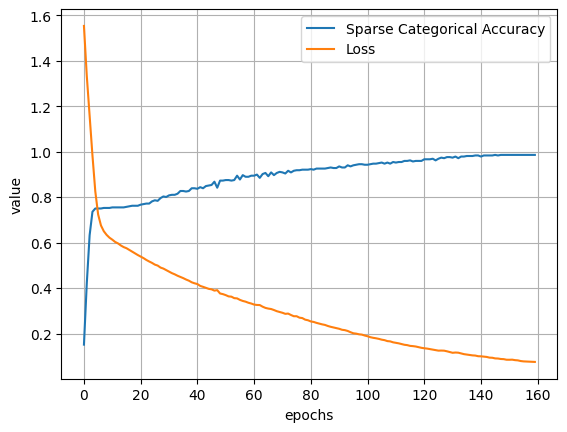

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0761 - sparse_categorical_accuracy: 0.7732  


[1.145058274269104, 0.7403846383094788]

In [321]:
plt.plot(training_results.history['sparse_categorical_accuracy'])
plt.plot(training_results.history['loss'])
plt.xlabel('epochs')
plt.ylabel('value')
plt.legend(['Sparse Categorical Accuracy', 'Loss'])
plt.grid(True)
plt.show()

ANN.evaluate(X_test, y_test)